### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## 1. Data Preprocessing

In [4]:
# Read the csv file

weather = pd.read_csv('weather.csv')
weather.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [5]:
# Handle missing values

missing_values = weather.isnull().sum()
print(missing_values)
weather = weather.dropna()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [6]:
# Remove any rows of WindDir9am with unexpected or missing values using re
# Extract WindDir9am rows starting with North using re and create new df

invalid_entries = ~weather['WindDir9am'].astype(str).str.match(r'^[NSEW]+$', na = False)
weather = weather[~invalid_entries]

weather_with_N = weather[weather['WindDir9am'].astype(str).str.startswith('N')]
weather_with_N.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
18,12.4,32.3,0.6,7.4,13.0,E,39.0,NNE,W,4.0,...,25,1017.1,1013.3,1,3,20.2,31.2,No,0.0,No
19,15.6,33.4,0.0,8.0,10.4,NE,33.0,NNW,NNW,2.0,...,27,1018.5,1013.7,0,1,22.8,32.0,No,0.0,No
20,15.3,33.4,0.0,8.8,9.5,WNW,59.0,N,NW,2.0,...,26,1012.4,1006.5,1,5,22.2,32.8,No,0.4,No
33,13.3,26.5,6.6,3.8,11.8,NW,50.0,NW,WNW,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,Yes,0.0,No


In [7]:
# Convert categorical variables and final check for missing values

weather["RainToday"] = weather["RainToday"].replace({"Yes": 1, "No": 0})
weather["RainTomorrow"] = weather["RainTomorrow"].replace({"Yes": 1, "No": 0})

# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
ordinal_encoder = OrdinalEncoder()
weather['WindDir9am'] = ordinal_encoder.fit_transform(weather[['WindDir9am']])
weather['WindGustDir'] = ordinal_encoder.fit_transform(weather[['WindGustDir']])
weather['WindDir3pm'] = ordinal_encoder.fit_transform(weather[['WindDir3pm']])

missing_values = weather.isnull().sum()
print(missing_values)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


/var/folders/n2/bhbkv9nn6cg6x_bjxc0t64nw0000gn/T/ipykernel_24221/3200634103.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather["RainToday"] = weather["RainToday"].replace({"Yes": 1, "No": 0})
/var/folders/n2/bhbkv9nn6cg6x_bjxc0t64nw0000gn/T/ipykernel_24221/3200634103.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather["RainTomorrow"] = weather["RainTomorrow"].replace({"Yes": 1, "No": 0})


In [8]:
weather.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,7.0,30.0,12.0,7.0,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,1.0,39.0,0.0,13.0,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,7.0,85.0,3.0,5.0,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,7.0,54.0,14.0,13.0,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,10.0,50.0,10.0,2.0,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


## 2. Exploratory Data Analysis

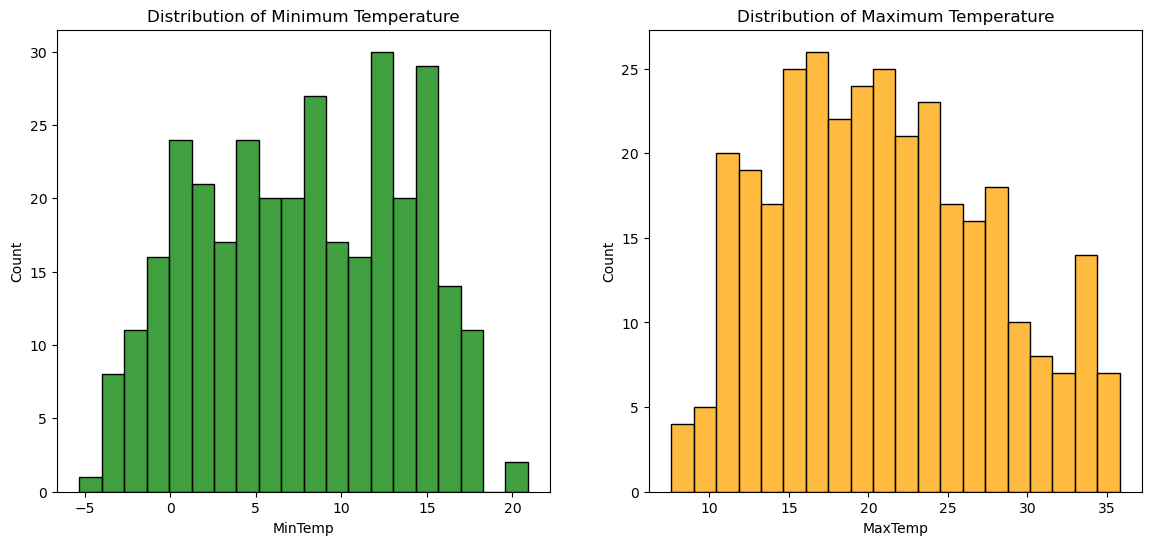

In [9]:
# Visualize distribution

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(weather['MinTemp'], bins = 20, color = 'green')
plt.title('Distribution of Minimum Temperature')

# Distribution of MaxTemp
plt.subplot(1, 2, 2)
sns.histplot(weather['MaxTemp'], bins = 20, color = 'orange')
plt.title('Distribution of Maximum Temperature')

plt.show()

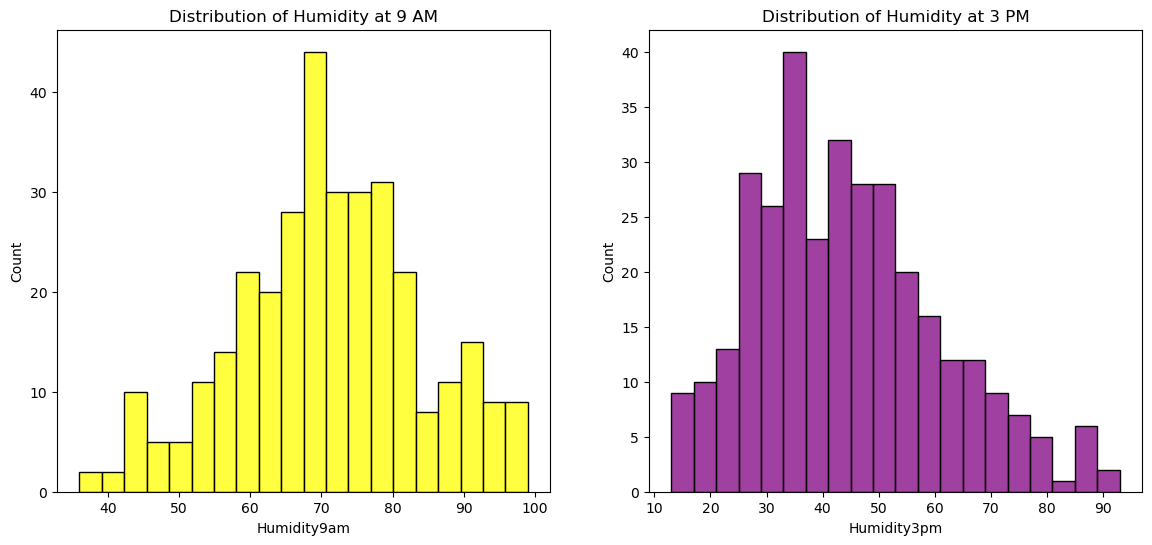

In [10]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(weather['Humidity9am'], bins = 20, color = 'yellow')
plt.title('Distribution of Humidity at 9 AM')

plt.subplot(1, 2, 2)
sns.histplot(weather['Humidity3pm'], bins = 20, color = 'purple')
plt.title('Distribution of Humidity at 3 PM')

plt.show()

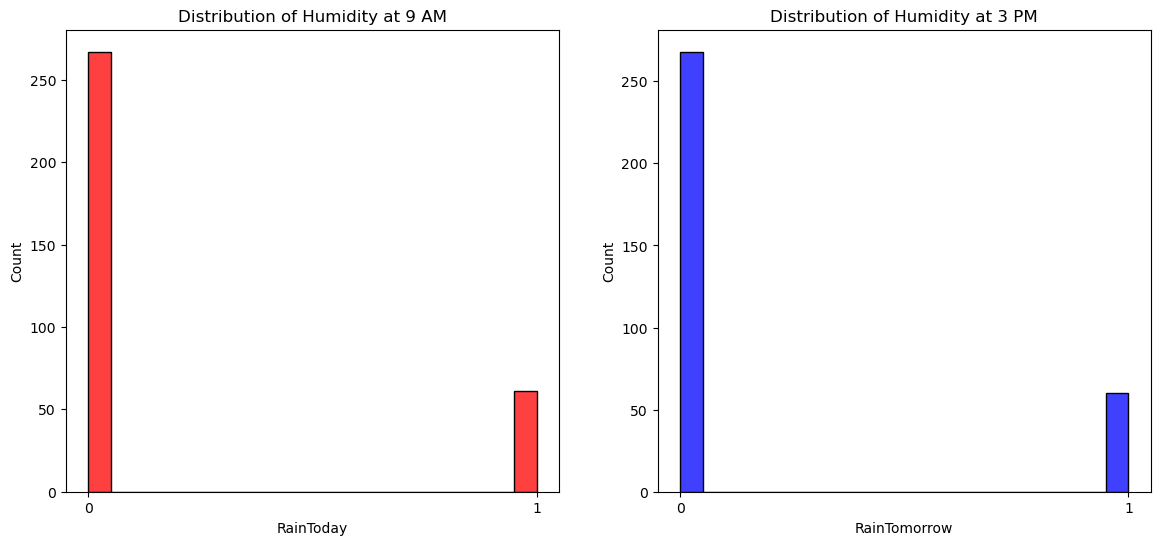

In [26]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.histplot(weather['RainToday'], bins = 20, color = 'red').set_xticks(range(2))
plt.title('Distribution of Humidity at 9 AM')

plt.subplot(1, 2, 2)
sns.histplot(weather['RainTomorrow'], bins=20, color = 'blue').set_xticks(range(2))
plt.title('Distribution of Humidity at 3 PM')

plt.show()

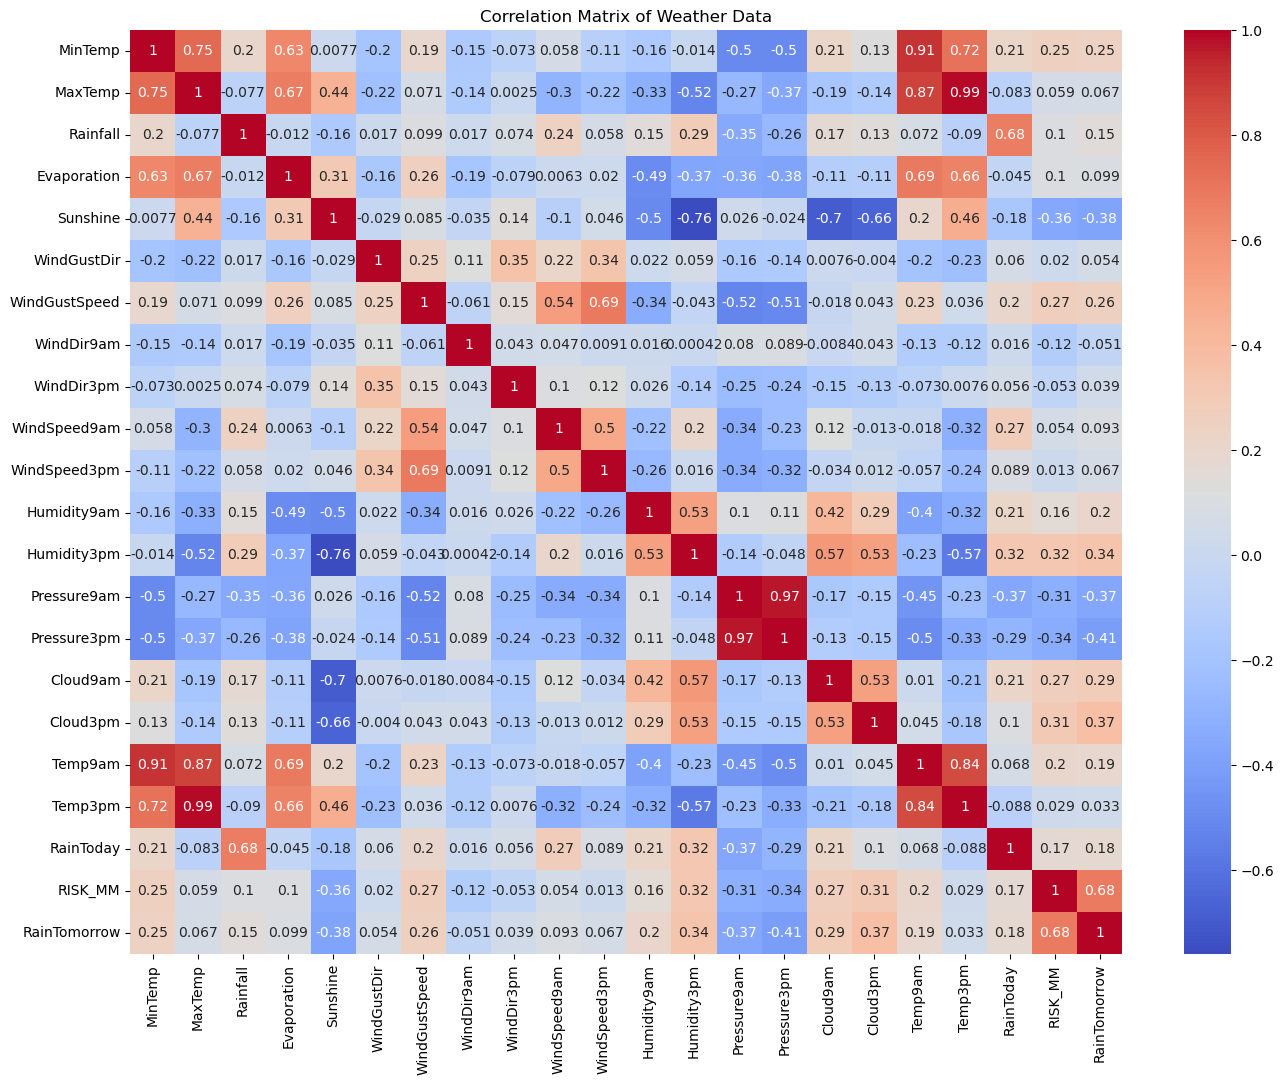

In [12]:
# Visualize initial correlation analysis

correlation_matrix = weather.corr()

plt.figure(figsize = (16, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Weather Data')
plt.show()

In [13]:
# Summary description of the data

summary_statistics = weather.describe()
summary_statistics

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,...,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,0.185976,1.422561,0.182927
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,...,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,0.389681,4.234023,0.387197
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000,0.000000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,...,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000,0.000000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,...,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000,0.000000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,...,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.000000,0.200000,0.000000
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,...,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,1.000000,39.800000,1.000000


## 3. Feature Engineering

In [14]:
# Normalize temp and humidity

normalize = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']
scaler = MinMaxScaler()

weather[normalize] = scaler.fit_transform(weather[normalize])
weather[normalize].head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm
0,0.507634,0.592199,0.507937,0.2000
1,0.736641,0.684397,0.698413,0.2875
2,0.725191,0.560284,0.730159,0.7000
3,0.709924,0.280142,0.412698,0.5375
4,0.492366,0.301418,0.507937,0.4500


In [15]:
# Create TempRange and AvgHumidity

weather['TempRange'] = weather['MaxTemp'] - weather['MinTemp']
weather['AvgHumidity'] = (weather['Humidity9am'] + weather['Humidity3pm']) / 2
weather[['TempRange', 'AvgHumidity']].head()

,TempRange,AvgHumidity
0,0.084565,0.353968
1,-0.052244,0.492956
2,-0.164907,0.715079
3,-0.429782,0.475099
4,-0.190948,0.478968


## 4. Visualizations

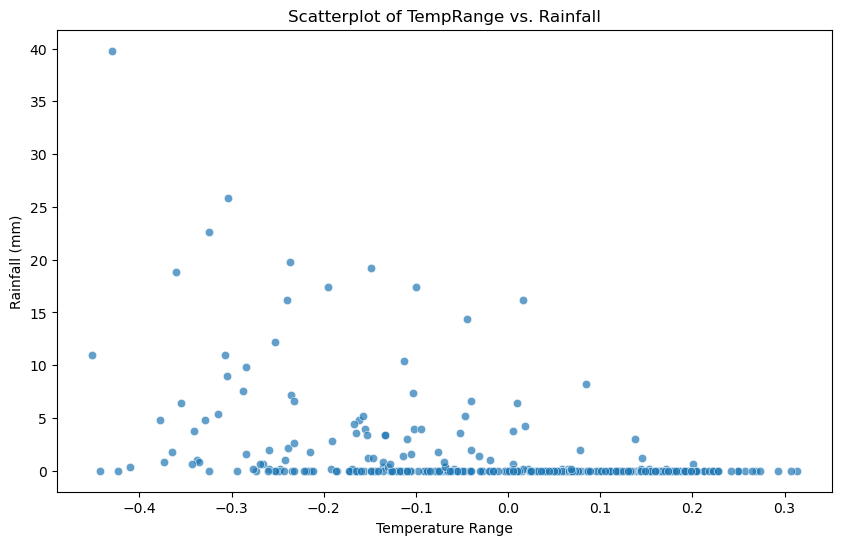

In [27]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'TempRange', y = 'Rainfall', data = weather, alpha = 0.7)
plt.title('Scatterplot of TempRange vs. Rainfall')
plt.xlabel('Temperature Range')
plt.ylabel('Rainfall (mm)')
plt.show()

/var/folders/n2/bhbkv9nn6cg6x_bjxc0t64nw0000gn/T/ipykernel_24221/3593211155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RainTomorrow', y = 'Sunshine', data=weather, palette = 'rocket')


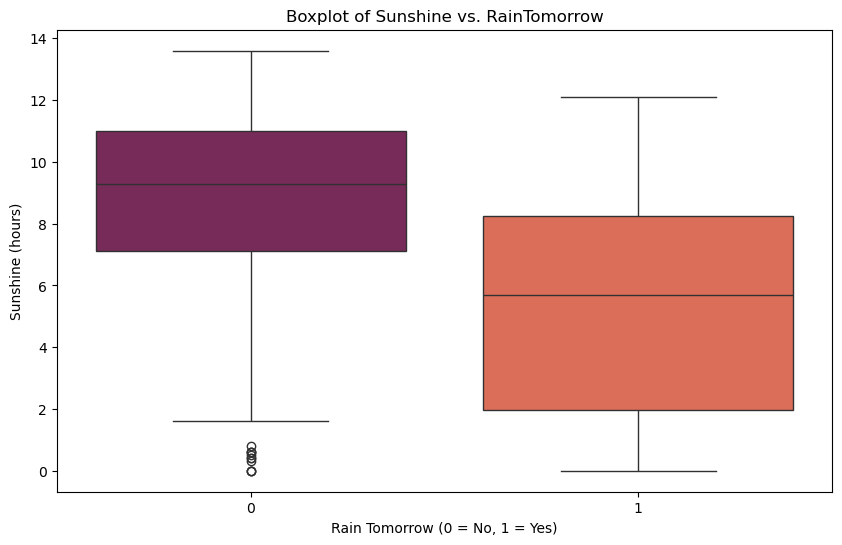

In [17]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'RainTomorrow', y = 'Sunshine', data = weather, palette = 'rocket')
plt.title('Boxplot of Sunshine vs. RainTomorrow')
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')
plt.ylabel('Sunshine (hours)')
plt.show()

## 5. Correlation Analysis

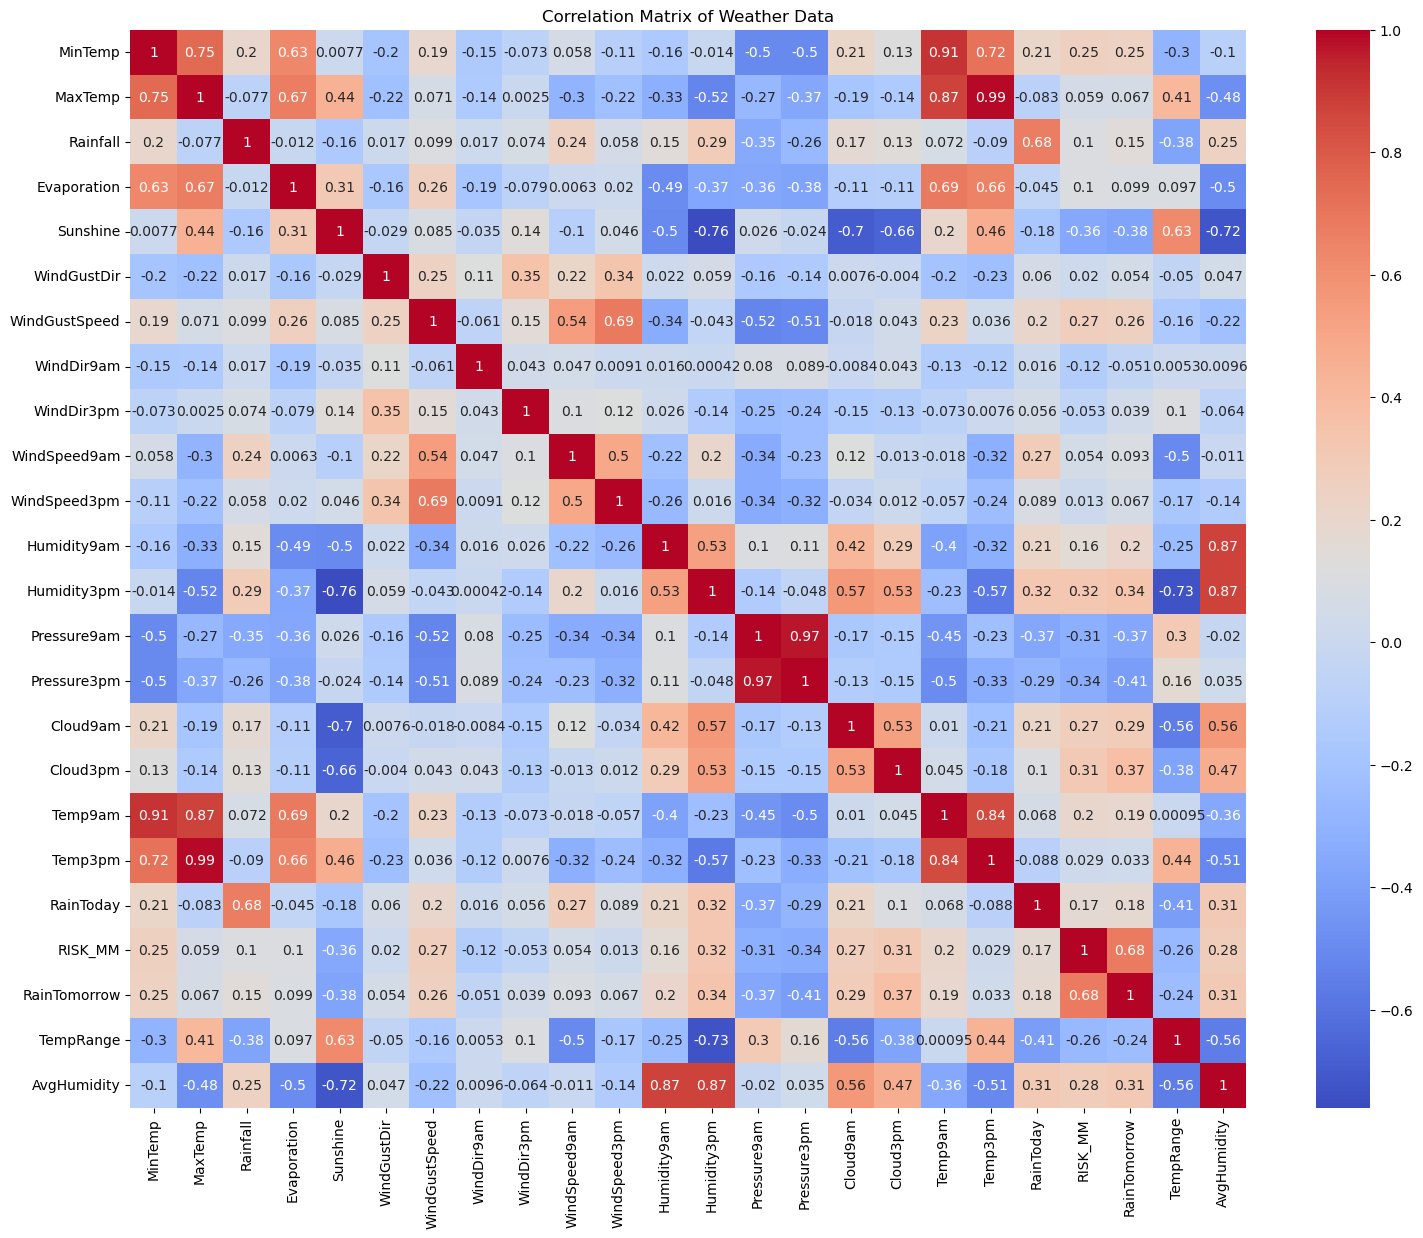

In [18]:
# Final correlation analysis with new columns

correlation_matrix = weather.corr()

plt.figure(figsize = (18, 14))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Weather Data')
plt.show()

## 6. Naïve Bayes Classifier

### 1. Clean and Preprocess

In [19]:
# Drop missing values, select feature variables and target variable

weather.dropna(inplace = True)

features = ['AvgHumidity','Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'MinTemp', 'RISK_MM', 'RainToday']
target = 'RainTomorrow'

### 2. Split Data

In [20]:
# Split the data 80/20 using the variables selected as X and the target as y

X = weather[features]
y = weather[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 333)

### 3. Train the Model

In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 4. Evaluate the model

In [22]:
# Print the accuracy scores, confusion matrix, and classification report for interpretation

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

train_accuracy = nb.score(X_train, y_train)
test_accuracy = nb.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Training Accuracy: 0.94
Test Accuracy: 0.95
Accuracy: 0.95

Confusion Matrix:
 [[49  3]
 [ 0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.82      1.00      0.90        14

    accuracy                           0.95        66
   macro avg       0.91      0.97      0.94        66
weighted avg       0.96      0.95      0.96        66



### 5. Visualize Results

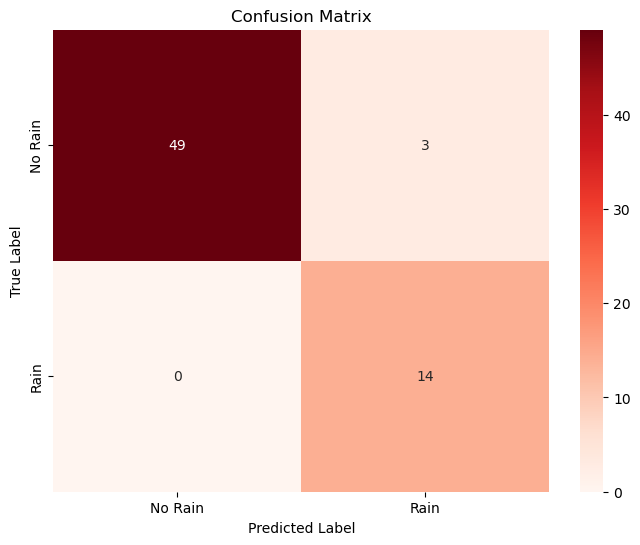

In [23]:
# Create a confusion matrix heatmap visualization

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = ['No Rain', 'Rain'], yticklabels = ['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

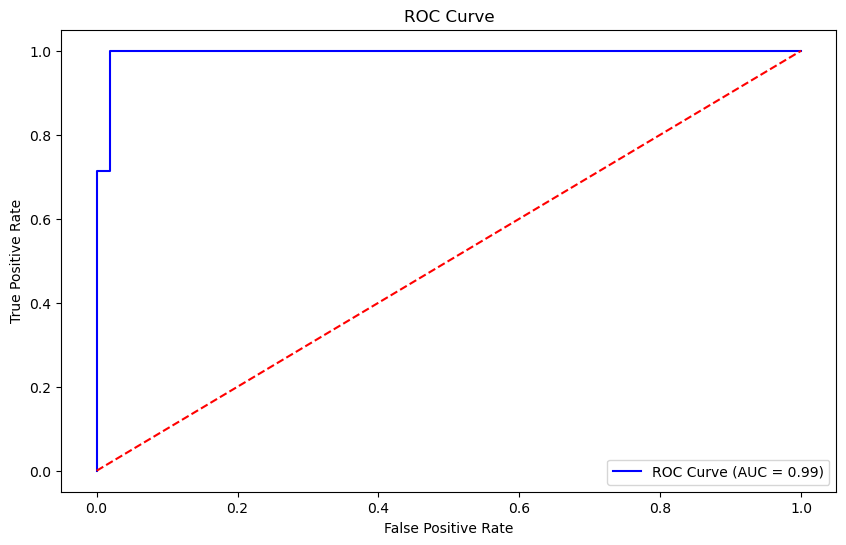

In [24]:
# Plot the ROC curve

y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 5. Analyze Results

The confusion matrix, classification report, ROC curve and AUC, all show that the model is performing well. There is only a 1% difference in the training and testing accuracies suggesting that the model is not overfitting. The overall accuracy is 95% and from the confusion matrix, we can see that there are no cases where no rain was falsely predicted and very few where rain was falsely predicted. The AUC is 0.99 suggesting that the model is almost perfect at distingushing between rain and no rain conditions. The closer the AUC is to 1, the better the model is at classifying. More data would be helpful in improving the precision and recall for each class, but for what is available, the model serves its purpose.